In [289]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # 导入数据集
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
from sklearn import preprocessing
from sklearn import metrics

In [290]:
data = pd.read_csv('J:\\103-Code\\07-Boston housing\\Date\\train_dataset.csv')

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     455 non-null    float64
 1   ZN       455 non-null    float64
 2   INDUS    455 non-null    float64
 3   CHAS     455 non-null    int64  
 4   NOX      455 non-null    float64
 5   RM       455 non-null    float64
 6   AGE      455 non-null    float64
 7   DIS      455 non-null    float64
 8   RAD      455 non-null    int64  
 9   TAX      455 non-null    int64  
 10  PIRATIO  455 non-null    float64
 11  B        455 non-null    float64
 12  LSTAT    455 non-null    float64
 13  PRICE    455 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 49.9 KB


In [292]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [293]:
data.shape

(455, 14)

<AxesSubplot: >

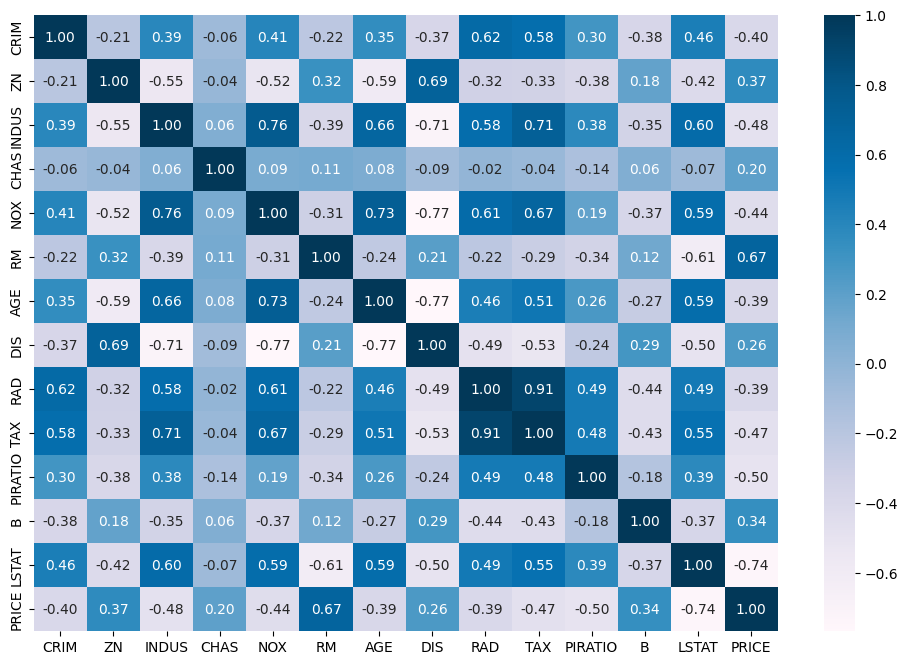

In [294]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='PuBu')

In [295]:
data.corr()['PRICE'].sort_values()


LSTAT     -0.742985
PIRATIO   -0.502491
INDUS     -0.480399
TAX       -0.472499
NOX       -0.437933
CRIM      -0.396399
RAD       -0.394492
AGE       -0.387366
CHAS       0.195238
DIS        0.259980
B          0.338793
ZN         0.371222
RM         0.669990
PRICE      1.000000
Name: PRICE, dtype: float64

In [296]:
data.isnull().sum() #统计缺失值

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PIRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [297]:
m = np.empty([455,14]) #标准化
data = data.to_numpy()
for i in range(14):
    m[:,i]=(data[:,i]-data[:,i].min())/(data[:,i].max()-data[:,i].min())

In [298]:
m

array([[0.00000000e+00, 1.89473684e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

In [299]:
x = m[:,0:13]
x

array([[0.00000000e+00, 1.89473684e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [300]:
y = m[:,13]
y

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.30888889,
       0.22222222, 0.30888889, 0.37111111, 0.34222222, 0.29333333,
       0.33111111, 0.40222222, 0.27777778, 0.33777778, 0.29333333,
       0.19111111, 0.32444444, 0.21777778, 0.29777778, 0.35555556,
       0.17111111, 0.21111111, 0.18222222, 0.18      , 0.18888889,
       0.30888889, 0.33333333, 0.35555556, 0.43777778, 0.43777778,
       0.36      , 0.31777778, 0.33333333, 0.25777778, 0.20888889,
       0.32      , 0.32666667, 0.34444444, 0.44444444, 0.40888889,
       0.30888889, 0.67555556, 0.43777778, 0.40666667, 0.32444444,
       0.30444444, 0.24444444, 0.38222222, 0.32      , 0.37777778,
       0.27555556, 0.35333333, 0.42666667, 0.37111111, 0.39555556,
       0.33333333, 0.35111111, 0.36      , 0.34      , 0.51111111,
       0.42      , 0.44      , 0.39777778, 0.42      , 0.48      ,
       0.38888889, 0.38222222, 0.41333333, 0.52666667, 0.39111111,
       0.37777778, 0.39777778, 0.44444444, 0.34666667, 0.52   

In [301]:
import math #数据集划分
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=123)

In [302]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(364, 13)
(364,)
(91, 13)
(91,)


In [303]:
# 决策树回归
from sklearn.tree import DecisionTreeRegressor

tr = DecisionTreeRegressor(max_depth=2) 

tr.fit(x_train, y_train) 
# 预测值 
tr_pre = tr.predict(x_validation)

# 模型评分 
print('Score:{:.4f}'.format(tr.score(x_validation, y_validation)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_validation,tr_pre))))


Score:0.6752
RMSE:0.1338


In [324]:
#梯度提升
from sklearn import ensemble

gb = ensemble.GradientBoostingRegressor()

gb.fit(x_train, y_train)
gb_pre=gb.predict(x_validation) 

# 模型评分 
print('Score:{:.4f}'.format(gb.score(x_validation, y_validation)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_validation,gb_pre))))


Score:0.2395
RMSE:0.2048


In [323]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10),'learning_rate':[0.01,0.03,0.06,0.1]}
gsearch1 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x_train, y_train)
gsearch1_pre=gsearch1.predict(x_validation) 
print(gsearch1.best_params_)


j:\101-Anacond\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "j:\101-Anacond\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "j:\101-Anacond\envs\pytorch\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "j:\101-Anacond\envs\pytorch\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
j:\101-Anacond\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

{'learning_rate': 0.01, 'n_estimators': 20}


j:\101-Anacond\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "j:\101-Anacond\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "j:\101-Anacond\envs\pytorch\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "j:\101-Anacond\envs\pytorch\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
j:\101-Anacond\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

In [306]:
#SVR-支持向量回归
from sklearn.svm import SVR

linear_svr = SVR(kernel="linear")
linear_svr.fit(x_train, y_train)
linear_svr_pre = linear_svr.predict(x_validation)

# 模型评分 
print('Score:{:.4f}'.format(linear_svr.score(x_validation, y_validation)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_validation,linear_svr_pre))))


Score:0.7937
RMSE:0.1067


In [307]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pre = RF.predict(x_validation)

# 模型评分 
print('Score:{:.4f}'.format(RF.score(x_validation, y_validation)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_validation,RF_pre))))


Score:0.9088
RMSE:0.0709


In [308]:
# 梯度下降
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train, y_train)
sgd_pre = sgd.predict(x_validation)

# 模型评分 
print('Score:{:.4f}'.format(sgd.score(x_validation, y_validation)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_validation,sgd_pre))))


Score:0.4339
RMSE:0.1767


In [309]:
#XGBOOST
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pre = xgb.predict(x_validation)

# 模型评分 
print('Score:{:.4f}'.format(xgb.score(x_validation, y_validation)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_validation,xgb_pre))))


Score:0.8979
RMSE:0.0751


In [310]:
#利用投标法融合模型
from sklearn.ensemble import VotingRegressor
gb = ensemble.GradientBoostingRegressor() #梯度提升
RF = RandomForestRegressor() #随机森林
xgb = XGBRegressor() #XGBOOST

voting = VotingRegressor(estimators=[('gb',gb),
                                      ('RF',RF),
                                      ('xgb',xgb)
                                      ])
voting.fit(x_train,y_train)
voting_pre = voting.predict(x_validation)

# 模型评分 
print('Score:{:.4f}'.format(voting.score(x_validation, y_validation)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_validation,voting_pre))))

Score:0.9196
RMSE:0.0666


In [311]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

linear_svr = SVR(kernel="linear")
gb = ensemble.GradientBoostingRegressor() #梯度提升
RF = RandomForestRegressor() #随机森林
xgb = XGBRegressor() #XGBOOST
lr = LinearRegression()
svr_rbf = SVR(kernel='rbf')

#融合四个模型
#stregr = StackingRegressor(regressors=[svr_lin, lr, ridge], meta_regressor=svr_rbf)
 
stregr = StackingRegressor(regressors=(
                                     RF,
                                     xgb,
                                     #gb,
                                     linear_svr,
                                     #lr,
                                     #svr_rbf
                                     ),
                           meta_regressor=
                                          #linear_svr
                                          gb
                                          #lr
                                          #svr_rbf
                                          )

# 训练stacking分类器
stregr.fit(x_train,y_train)
stregr_pre = stregr.predict(x_validation)
 

# 模型评分 
print('Score:{:.4f}'.format(stregr.score(x_validation, y_validation)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_validation,stregr_pre))))

Score:0.8967
RMSE:0.0755


In [312]:
# 堆叠5折CV分类与网格搜索(结合网格搜索调参优化)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor() #梯度提升
RF = RandomForestRegressor() #随机森林
xgb = XGBRegressor() #XGBOOST
linear_svr = SVR(kernel="linear")
 
# Initializing models
'''params = {'gradientBoostingRegressor__learning_rate': [0.05,0.2],
          'gradientBoostingRegressor__n_estimators': [10,50],
          'randomForestRegressor__n_estimators': [10, 50],
          'xGBRegressor__learning_rate': [0.05,0.2],
          'xGBRegressor__n_estimators': [10,50]
          }'''

params = {'gradientBoostingRegressor__n_estimators':range(20,81,10)}
 
grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=10,
                    )
grid.fit(x_train,y_train)
 
cv_keys = ('mean_test_score', 'std_test_score', 'params')
 
for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))
 
print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)


ValueError: Invalid parameter 'gradientBoostingRegressor' for estimator StackingRegressor(meta_regressor=GradientBoostingRegressor(),
                  regressors=(RandomForestRegressor(),
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                              SVR(kernel='linear'))). Valid parameters are: ['meta_regressor', 'multi_output', 'refit', 'regressors', 'store_train_meta_features', 'use_features_in_secondary', 'verbose'].